In [12]:
import pandas as pd

In [13]:
nintendoswitchVader = pd.read_csv('../data/processed/nintendoswitch/comments-vader.csv')
nintendoswitchTextblob = pd.read_csv('../data/processed/nintendoswitch/comments-textblob.csv')

### Evaluating sentiment performed with Vader

In [14]:
nintendoswitchVader

,Reply,Upvote,Time,Key,neg,neu,pos,compound
0,Whoaaa ! Your kid must be so excited,3072,2019-10-18 06:01:58,0,0.000,0.638,0.362,0.5280
1,"Nice , grats ! Back in 1999 I actually won a N...",9307,2019-10-18 06:04:13,0,0.000,0.693,0.307,0.7955
2,Huh . People actually win from these things ?,4663,2019-10-18 06:01:10,0,0.000,0.612,0.388,0.5859
3,Dang ! Congats ! What games ?,920,2019-10-18 06:11:15,0,0.000,1.000,0.000,0.0000
4,I won an Amazon Fire from a string cheese pack...,378,2019-10-18 06:04:36,0,0.097,0.525,0.379,0.7896
...,...,...,...,...,...,...,...,...
101821,I thought you meant more like this :,1,2019-07-20 13:54:00,39,0.000,0.642,0.358,0.4201
101822,"Sure , but I 'm not a speedrunner , and neithe...",1,2019-07-21 05:32:58,39,0.000,0.920,0.080,0.1655
101823,Ok . I have n't played any of those games exce...,2,2019-07-20 11:41:54,39,0.030,0.848,0.122,0.6327
101824,It 's really funny you mention Celeste . I tri...,1,2019-07-20 12:04:45,39,0.000,0.896,0.104,0.7485


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

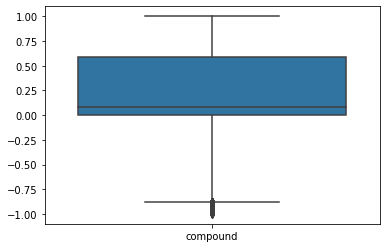

In [16]:
sns.boxplot(data=nintendoswitchVader[["compound"]])

The compound metric from the VADER sentiment analysis is a metric that calculates calculates the sum of the lexicon ratings. Here, we observe that we have a ever-so slight skew towards a positive sentiment.

<AxesSubplot:ylabel='Density'>

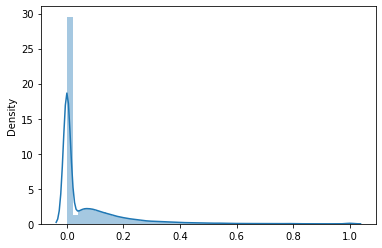

In [17]:
sns.distplot(nintendoswitchVader[["neg"]])

<AxesSubplot:ylabel='Density'>

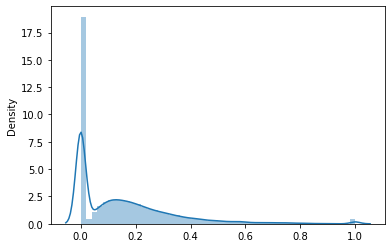

In [18]:
sns.distplot(nintendoswitchVader[["pos"]])

Looking at the distribution density of the postitive and negative scores doesn't tell us much as I would have assumed.


<AxesSubplot:ylabel='Density'>

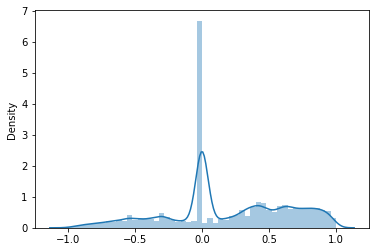

In [19]:
sns.distplot(nintendoswitchVader[["compound"]])

We can see a bit more going on here when looking at the compund score distribution. We have a high distribution of sentiment around the 0 level where a message as meassured as neutral; this would occur where comments do not convey any positive or negative sentiment in which case they are classified as neutral by VADER.

Overall, VADER has evaluated the comments we have scraped off of r/nintendoswitch as being generally positive.

In [37]:
# take datetime column to get month and year
nintendoswitchVader["month"] = pd.to_datetime(nintendoswitchVader.Time).dt.month
nintendoswitchVader["year"] = pd.to_datetime(nintendoswitchVader.Time).dt.year

<AxesSubplot:xlabel='year', ylabel='count'>

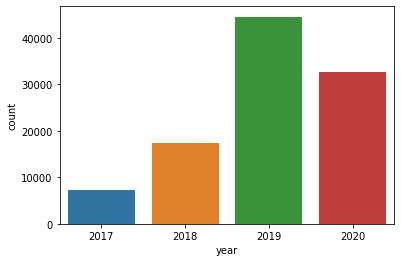

In [43]:
sns.countplot(x="year",data=nintendoswitchVader)

In [48]:
nintendoswitchVaderMonth = nintendoswitchVader.groupby(by=["month"]).mean()
nintendoswitchVaderMonth

,Upvote,Key,neg,neu,pos,compound,year
month,,,,,,,
1,24.851809,23.782582,0.064576,0.787187,0.144037,0.209560,2018.008129
2,23.417897,17.589330,0.073393,0.752332,0.156741,0.212605,2019.000923
3,25.532774,16.458560,0.067209,0.755000,0.172618,0.225309,2019.260517
4,24.602679,26.621652,0.071711,0.720891,0.157172,0.163292,2019.091518
5,16.476404,15.162534,0.078813,0.749068,0.168277,0.172348,2019.834746
6,25.951053,16.532447,0.070012,0.779902,0.145676,0.191124,2018.817703
7,16.625911,33.468176,0.065182,0.805458,0.125195,0.172593,2018.995924
8,12.749173,6.436112,0.070048,0.770545,0.157049,0.239518,2019.762407
9,17.628684,18.022667,0.073101,0.769603,0.153918,0.190657,2019.455792


This shows us an aggregated look of sentiment ratings for each month.

<AxesSubplot:xlabel='month', ylabel='compound'>

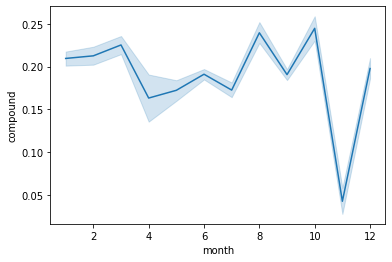

In [52]:
sns.lineplot(x='month', y='compound', data=nintendoswitchVader) 

We got a interesting anomaly where November seems to have a sharp drop in sentiment. We should take a further look into the data to see what is causing this anomaly.

In [53]:
nintendoswitchVader['month'].value_counts()

6     19940
9     19544
7     11532
1     11195
3      7155
2      6504
8      6347
5      6251
12     4941
10     3953
11     3568
4       896
Name: month, dtype: int64

Nothing seems to unusual here. November is showing as the second lowest of comment observations which could potentially be an issue this may indicate that we did not take a large enough sample size when scraping therefore leading to a poor sentiment during the month of November.

Another thing to note is that April is also showing a very low observations which is leading to the large 95% confidence interval shown in the line plot above.

### Evaluating sentiment performed with Textblob

In [20]:
nintendoswitchTextblob

,Reply,Upvote,Time,Key,Classification,positive,negative
0,Whoaaa ! Your kid must be so excited,3072,2019-10-18 06:01:58,0,pos,0.652933,0.347067
1,"Nice , grats ! Back in 1999 I actually won a N...",9307,2019-10-18 06:04:13,0,neg,0.063053,0.936947
2,Huh . People actually win from these things ?,4663,2019-10-18 06:01:10,0,neg,0.293430,0.706570
3,Dang ! Congats ! What games ?,920,2019-10-18 06:11:15,0,pos,0.599253,0.400747
4,I won an Amazon Fire from a string cheese pack...,378,2019-10-18 06:04:36,0,neg,0.226188,0.773812
...,...,...,...,...,...,...,...
101821,I thought you meant more like this :,1,2019-07-20 13:54:00,39,neg,0.333497,0.666503
101822,"Sure , but I 'm not a speedrunner , and neithe...",1,2019-07-21 05:32:58,39,neg,0.381727,0.618273
101823,Ok . I have n't played any of those games exce...,2,2019-07-20 11:41:54,39,pos,0.530976,0.469024
101824,It 's really funny you mention Celeste . I tri...,1,2019-07-20 12:04:45,39,pos,0.853542,0.146458


<AxesSubplot:xlabel='Classification', ylabel='count'>

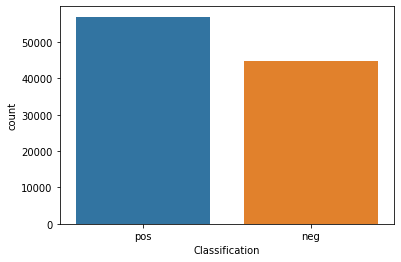

In [21]:
sns.countplot(x="Classification", data=nintendoswitchTextblob)

<AxesSubplot:>

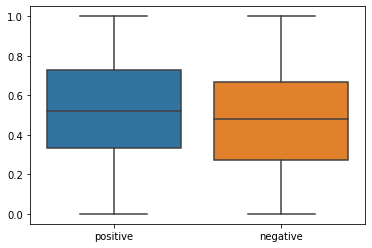

In [22]:
sns.boxplot(data=nintendoswitchTextblob[["positive", "negative"]])


As with VADER's evaluation, we get a similar output where overall, the comments scraped from r/nintendoswitch are generally postitive.

In [54]:
# take datetime column to get month and year
nintendoswitchTextblob["month"] = pd.to_datetime(nintendoswitchTextblob.Time).dt.month
nintendoswitchTextblob["year"] = pd.to_datetime(nintendoswitchTextblob.Time).dt.year

<AxesSubplot:xlabel='month', ylabel='positive'>

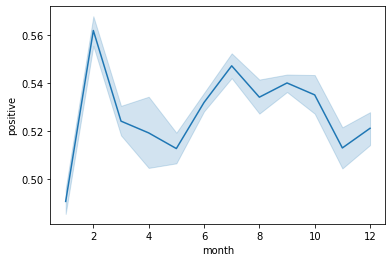

In [61]:
sns.lineplot(x='month', y='positive', data=nintendoswitchTextblob)

Plotting positive scoring against month shows us that we have a sharp peak at the beginning of the year and then a increase towards second half of the year there are likely game release news in anticipation for the holiday sales.

In [62]:
nintendoswitchTextblob.mean()

Upvote        21.529413
Key           19.300552
positive       0.529704
negative       0.470296
month          6.340355
year        2019.007375
dtype: float64